In [32]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider
from PIL import Image
import os
import seaborn as sns

# Replace 'path/to/your/images' with the path to your image folder
image_folder = 'results/blind_blur/progress/img/'

# Create a list of image filenames in the folder
images = [os.path.join(image_folder, img) for img in sorted(os.listdir(image_folder))]
# Read images and store them in a list
image_list = [Image.open(image) for image in images]

# Now, image_list is a list of PIL Image objects representing your images

# Function to display a slice of the volume
def display_slice(step):
    plt.imshow(image_list[step])
    plt.title(f'Step {step * 10}')
    plt.colorbar()
    plt.show()

# Using ipywidgets to create an interactive slider
interact(display_slice, step=IntSlider(min=0, max=len(image_list) - 1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='step', max=199), Output()), _dom_classes=('widget-intera…

<function __main__.display_slice(step)>

## Figure 1: deblurring sample

/tmp/ipykernel_162137/2858074612.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


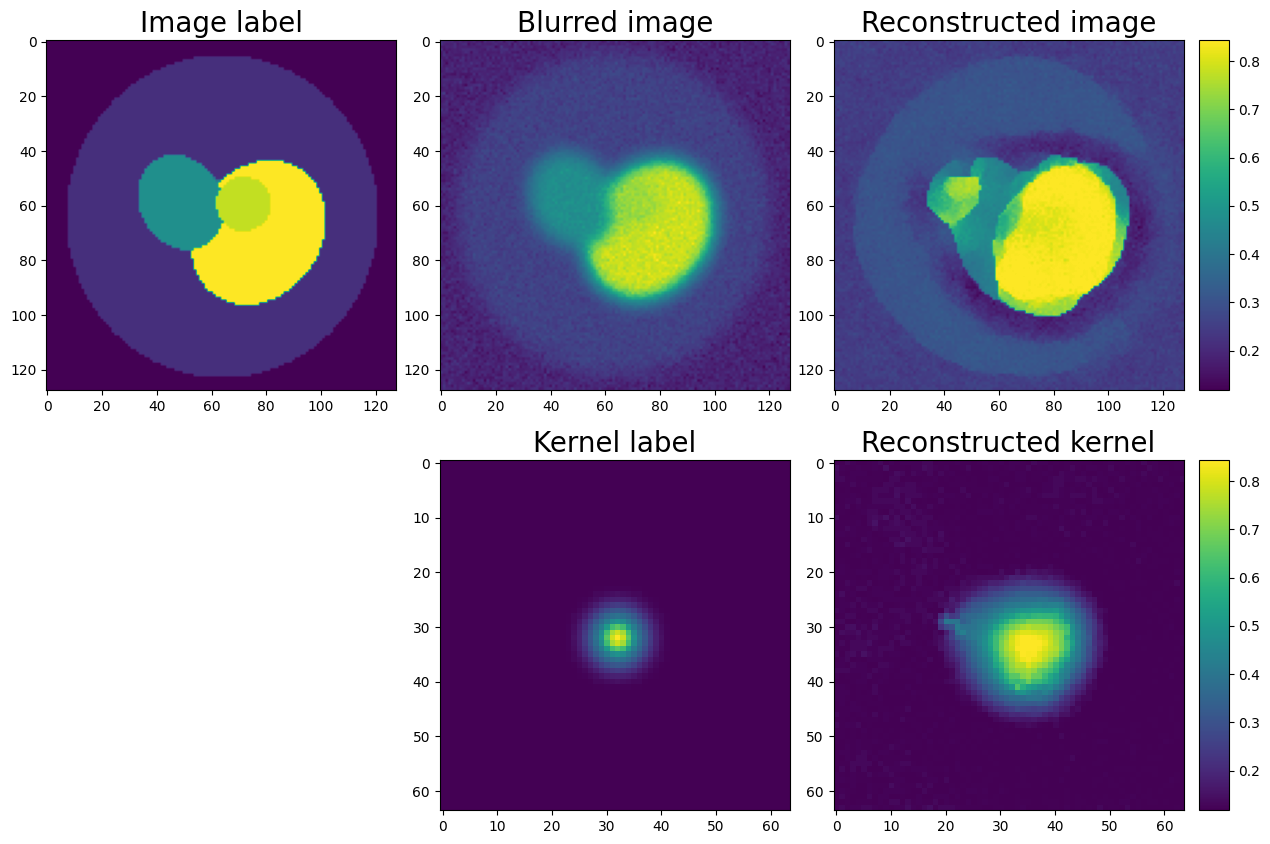

In [4]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from PIL import Image  # Assuming you have PIL installed
import numpy as np

# Generate some sample data (replace with your paths)
path_img_label = 'results/blind_blur/label/img_00000.png'
path_kernel_label = 'results/blind_blur/label/ker_00000.png'
path_img_input = 'results/blind_blur/input/00000.png'
path_img_recons = 'results/blind_blur/recon/img_00000.png'
path_kernel_recons = 'results/blind_blur/recon/ker_00000.png'


img_label = np.array(Image.open(path_img_label).convert('L')) / 255
kernel_label = np.array(Image.open(path_kernel_label).convert('L')) / 255
img_input = np.array(Image.open(path_img_input).convert('L')) / 255
img_recons = np.array(Image.open(path_img_recons).convert('L')) / 255
kernel_recons = np.array(Image.open(path_kernel_recons).convert('L')) / 255

fontsize = 20

# Create a 2x2 subplot grid with different column widths
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1], wspace=0.05)

# Plot data on each subplot and add colorbars
axs = [plt.subplot(gs[0, 0]), plt.subplot(gs[0, 1]), plt.subplot(gs[0, 2]),
       plt.subplot(gs[1, 0]), plt.subplot(gs[1, 1]), plt.subplot(gs[1, 2])]

images = [img_label, img_input, img_recons, kernel_label, kernel_recons]
titles = ['Image label', 'Blurred image', 'Reconstructed image', 'Kernel label', 'Reconstructed kernel']

axs[0].imshow(images[0])
axs[0].set_title(titles[0], fontsize=fontsize)

axs[1].imshow(images[1])
axs[1].set_title(titles[1], fontsize=fontsize)

im2 = axs[2].imshow(images[2])
axs[2].set_title(titles[2], fontsize=fontsize)
cax = fig.add_axes([axs[2].get_position().x1 + 0.01, axs[2].get_position().y0, 0.02, axs[2].get_position().height])
fig.colorbar(im2, cax=cax)
            
axs[4].imshow(images[3])
axs[4].set_title(titles[3], fontsize=fontsize)

im5 = axs[5].imshow(images[4])
axs[5].set_title(titles[4], fontsize=fontsize)
cax = fig.add_axes([axs[5].get_position().x1 + 0.01, axs[5].get_position().y0, 0.02, axs[5].get_position().height])
fig.colorbar(im5, cax=cax)



axs[3].axis('off')  # Turn off the axis for the empty subplot in the second row

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


## Figure 2: MSE vs Kernel spread

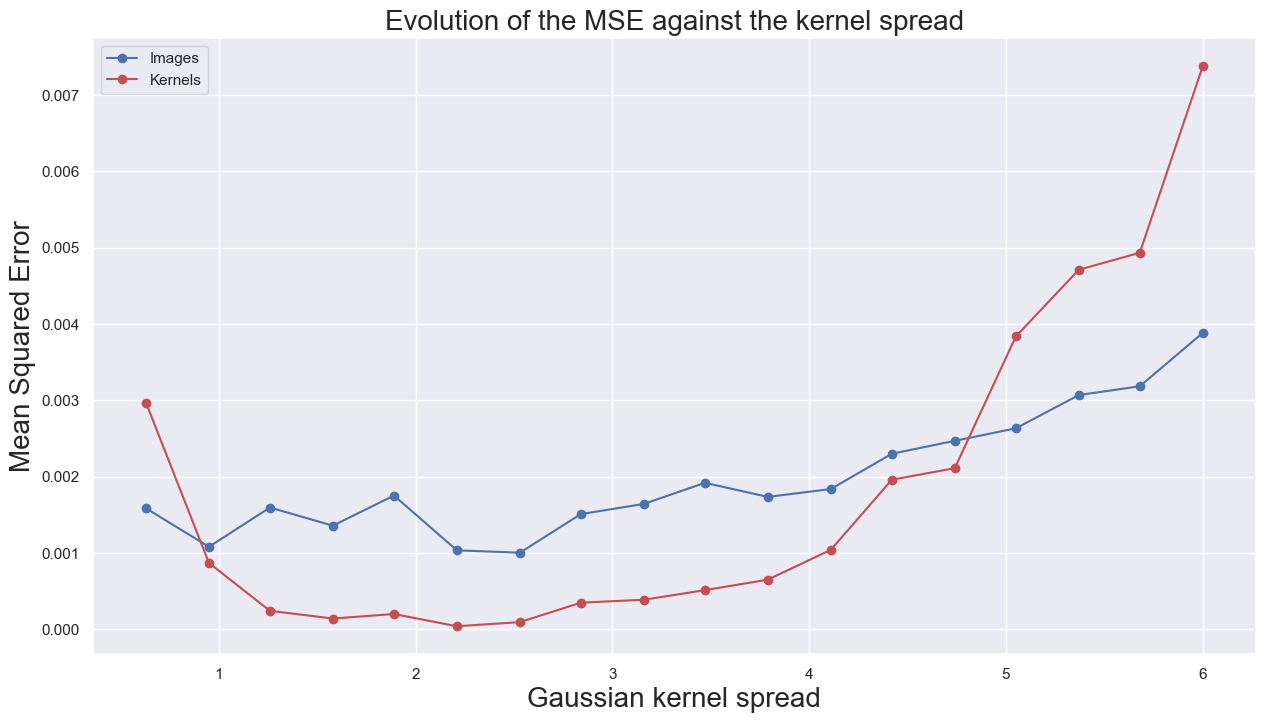

In [66]:
sns.set_theme()

root_dir = '/home/modrzyk/code/blind-dps/results/varying_gaussian_spread/'

img_names = [f'img_0000{i}.png' for i in range(0, 10)]
ker_names = [f'ker_0000{i}.png' for i in range(0, 10)]

mses_ker = []
mses_img = []
spreads = os.listdir(root_dir)
spread_floats = [round(float(value), 2) for value in spreads]

fontsize = 20

for spread in spreads:
    
    label_dir = os.path.join(root_dir, spread, 'blind_blur', 'label')
    recon_dir = os.path.join(root_dir, spread, 'blind_blur', 'recon')
    
    mse_ker = 0.0
    mse_img = 0.0
    
    for img_name, ker_name in zip(img_names, ker_names):
        path_img_label = os.path.join(label_dir, img_name)
        path_ker_label = os.path.join(label_dir, ker_name)
        
        path_img_recon = os.path.join(recon_dir, img_name)
        path_ker_recon = os.path.join(recon_dir, ker_name)

        img_label = np.array(Image.open(path_img_label).convert('L')) / 255
        ker_label = np.array(Image.open(path_ker_label).convert('L')) / 255
        img_recon = np.array(Image.open(path_img_recon).convert('L')) / 255
        ker_recon = np.array(Image.open(path_ker_recon).convert('L')) / 255
        
        mse_img += ((img_label - img_recon)**2).mean(axis=None)
        mse_ker += ((ker_label - ker_recon)**2).mean(axis=None)
        
    mse_ker /= 10
    mse_img /= 10
    mses_ker.append(mse_ker)
    mses_img.append(mse_img)

spread_floats = [round(float(value), 2) for value in spreads]
mses_ker_floats = [round(float(value), 2) for value in mses_ker]
mses_img_floats = [round(float(value), 2) for value in mses_img]

# Sort the combined list based on the first element of each tuple (original_values)
sorted_combined_data = sorted(list(zip(spreads, mses_img, mses_ker)), key=lambda x: x[0])

# Unpack the sorted tuples back into separate lists
spreads, mses_img, mses_ker = zip(*sorted_combined_data)

spreads = [round(float(value), 2) for value in spreads]

plt.figure(figsize=(15, 8))
# Plotting the data
plt.plot(spreads, mses_img, marker='o', linestyle='-', color='b', label='Images')
plt.plot(spreads, mses_ker, marker='o', linestyle='-', color='r', label='Kernels')

# Adding labels and title
plt.xlabel('Gaussian kernel spread', fontsize=fontsize)
plt.ylabel('Mean Squared Error', fontsize=fontsize)
plt.title('Evolution of the MSE against the kernel spread', fontsize=fontsize)

# Adding a legend
plt.legend()

# Display the plot
plt.show()
        

In [44]:
print(spreads)

['4.105263157894736', '1.894736842105263', '1.263157894736842', '2.2105263157894735', '5.368421052631579', '5.052631578947368', '3.789473684210526', '2.526315789473684', '0.631578947368421', '3.4736842105263155', '0.0', '4.421052631578947', '2.8421052631578947', '5.684210526315789', '0.3157894736842105', '1.5789473684210527', '6.0', '0.9473684210526315', '4.7368421052631575', '3.1578947368421053']


In [48]:
# Example lists
original_values = spreads
associated_data = mses_img

# Combine the two lists into a list of tuples
combined_data = list(zip(spreads, mses_img, mses_ker))

# Sort the combined list based on the first element of each tuple (original_values)
sorted_combined_data = sorted(list(zip(spreads, mses_img, mses_ker)), key=lambda x: x[0])

# Unpack the sorted tuples back into separate lists
spreads, mses_img, mses_ker = zip(*sorted_combined_data)

print(spreads, mses_img, mses_ker)

('0.0', '0.3157894736842105', '0.631578947368421', '0.9473684210526315', '1.263157894736842', '1.5789473684210527', '1.894736842105263', '2.2105263157894735', '2.526315789473684', '2.8421052631578947', '3.1578947368421053', '3.4736842105263155', '3.789473684210526', '4.105263157894736', '4.421052631578947', '4.7368421052631575', '5.052631578947368', '5.368421052631579', '5.684210526315789', '6.0') (0.0013682839270052383, 0.0011532852073120913, 0.0015845959937283737, 0.0010798739704981257, 0.0015947071326232697, 0.001357113061983372, 0.0017517516925581508, 0.001034021432561995, 0.0010029951108047384, 0.0015090561998390042, 0.001641758221747645, 0.0019184177021758456, 0.0017338927260548826, 0.0018368929430687714, 0.002299394782805892, 0.0024684869926831026, 0.002632236268051951, 0.0030678716569348327, 0.003183066984453095, 0.0038828177563917723) (0.017916839376682047, 0.0429640999705642, 0.0029703017619425224, 0.0008685519091214918, 0.00024149365628604383, 0.0001406445237408689, 0.000199